## Statistical Analysis

In [32]:
import sqlite3
import pandas as pd
from scipy.stats import pearsonr
import numpy as np
from pandas.plotting import scatter_matrix

In [3]:
conn = sqlite3.connect('resources/ukraine_analysis.sqlite')

In [20]:
stats_df = pd.read_sql('select * from migration_sentiments', conn)
stats_df.head()

,data_date,ukraine_migration,ukraine_casualties,russia_casualties,russia_prisoners,compound_sentiment
0,02/24,82955.0,30.0,NaN,NaN,-0.108154
1,02/25,104787.0,25.0,2800.0,0.0,-0.048700
2,02/26,147927.0,185.0,1500.0,0.0,-0.006785
3,02/27,171579.0,0.0,200.0,0.0,-0.026094
4,02/28,163607.0,166.0,800.0,0.0,-0.063197


### Preprocess data for statistical analysis

In [21]:
# select columns
stats_df = stats_df[['data_date', 'ukraine_migration', 'ukraine_casualties', 'compound_sentiment']]
# count null values
stats_df.isna().sum()

data_date              0
ukraine_migration      0
ukraine_casualties    14
compound_sentiment    13
dtype: int64

In [22]:
# drop null values
stats_df = stats_df.dropna()
stats_df

,data_date,ukraine_migration,ukraine_casualties,compound_sentiment
0,02/24,82955.0,30.0,-0.108154
1,02/25,104787.0,25.0,-0.048700
2,02/26,147927.0,185.0,-0.006785
3,02/27,171579.0,0.0,-0.026094
4,02/28,163607.0,166.0,-0.063197
5,03/01,168167.0,144.0,-0.099070
6,03/02,173952.0,202.0,-0.100120
7,03/03,166382.0,86.0,-0.078467
8,03/04,171826.0,168.0,-0.108797
9,03/05,197818.0,52.0,-0.039252


In [26]:
# set date as categorical variable
stats_df['data_date'] = stats_df['data_date'].astype('category').cat.codes

### Test hypothesis that variables are correlated

In [31]:
# create correlation matrix
matrix = stats_df.corr(method='pearson')
matrix

,data_date,ukraine_migration,ukraine_casualties,compound_sentiment
data_date,1.000000,-0.349582,0.043066,-0.026246
ukraine_migration,-0.349582,1.000000,0.133332,0.030771
ukraine_casualties,0.043066,0.133332,1.000000,-0.029081
compound_sentiment,-0.026246,0.030771,-0.029081,1.000000


In [27]:
# edit matrix to add p-value and make it easier to read

# get p-value
pvalue = stats_df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*matrix.shape)
p = pvalue.applymap(lambda x: ''.join(['*' for t in [0.05] if x<=t]))
matrix.round(2).astype(str) + p

# create mask to color half of the matrix as gray to make it easier to read
mask = np.zeros_like(matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
matrix[mask] = np.nan
(matrix
 .style
 .background_gradient(cmap='Blues', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')
 .set_precision(2))

,data_date,ukraine_migration,ukraine_casualties,compound_sentiment
data_date,nan,nan,nan,nan
ukraine_migration,-0.35,nan,nan,nan
ukraine_casualties,0.04,0.13,nan,nan
compound_sentiment,-0.03,0.03,-0.03,nan


array([[<AxesSubplot:xlabel='data_date', ylabel='data_date'>,
        <AxesSubplot:xlabel='ukraine_migration', ylabel='data_date'>,
        <AxesSubplot:xlabel='ukraine_casualties', ylabel='data_date'>,
        <AxesSubplot:xlabel='compound_sentiment', ylabel='data_date'>],
       [<AxesSubplot:xlabel='data_date', ylabel='ukraine_migration'>,
        <AxesSubplot:xlabel='ukraine_migration', ylabel='ukraine_migration'>,
        <AxesSubplot:xlabel='ukraine_casualties', ylabel='ukraine_migration'>,
        <AxesSubplot:xlabel='compound_sentiment', ylabel='ukraine_migration'>],
       [<AxesSubplot:xlabel='data_date', ylabel='ukraine_casualties'>,
        <AxesSubplot:xlabel='ukraine_migration', ylabel='ukraine_casualties'>,
        <AxesSubplot:xlabel='ukraine_casualties', ylabel='ukraine_casualties'>,
        <AxesSubplot:xlabel='compound_sentiment', ylabel='ukraine_casualties'>],
       [<AxesSubplot:xlabel='data_date', ylabel='compound_sentiment'>,
        <AxesSubplot:xlabel='ukraine

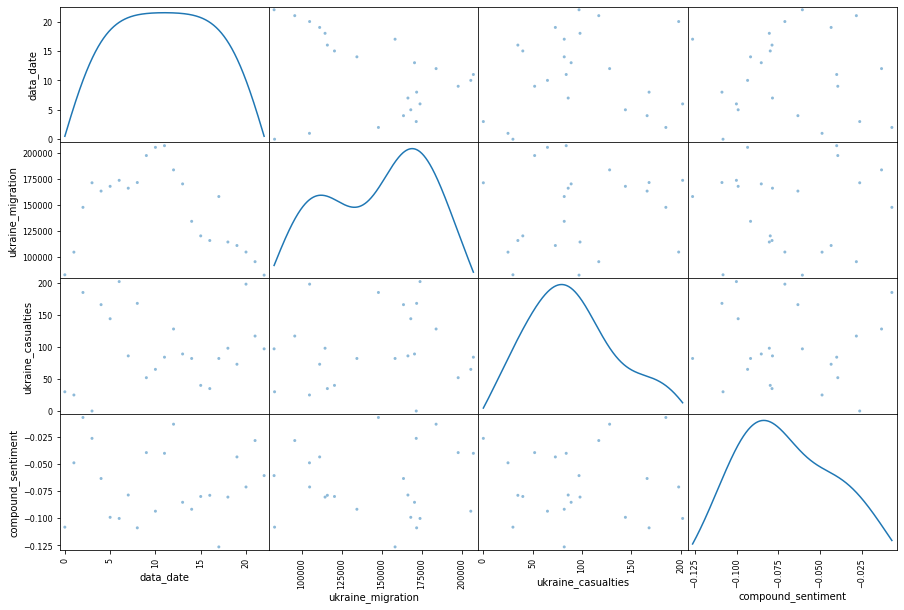

In [35]:
# use scatterplots to check if relationship is nonlinear
scatter_matrix(stats_df, alpha=0.5, figsize=(15, 10), diagonal='kde')

In [36]:
#close out the connection
conn.close()